In [2]:
%matplotlib inline

import numpy as np
import itertools
import random
import math
import matplotlib.pyplot as plt
import tqdm
from datetime import timedelta

import import_ipynb
from rules import Game
from players import GreedyPlayer, MCTSPlayer, UCTPlayer

importing Jupyter notebook from rules.ipynb
importing Jupyter notebook from draw.ipynb
Current player: 0 - Score: 0/0
------------------
  5  5  6  0  5  5
  5  5  4  4  4  0
importing Jupyter notebook from players.ipynb


In [3]:
def play_game(player, opponent):
    game = Game.start_game()
    opponent_action = -1
    i = 0
    
    while not game.game_finished and i < 500:
        player_action = player.play(opponent_action)
        game, captures, finished = game.step(player_action)

        player, opponent = opponent, player
        opponent_action = player_action
        i += 1
    ret = game.winner
    del game
    return ret

In [12]:
import itertools

eps = np.linspace(0, 1, 11)

def greedy_meet(eps1, eps2):
    winners = []
    for i in range(50):
        player = GreedyPlayer(0, eps1)
        opponent = GreedyPlayer(1, eps2)
        winner = play_game(player, opponent)
        winners.append(winner if winner is not None else 0.5)
    return np.array(winners)
        

In [13]:
res = np.zeros((len(eps), len(eps), 50))

for i, eps1 in enumerate(tqdm.tqdm_notebook(eps)):
    for j, eps2 in enumerate(eps):
        res[i, j] = greedy_meet(eps1, eps2)

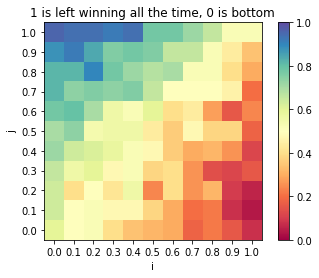

In [17]:
plt.imshow(res.mean(axis=2), origin='lower', cmap='Spectral')
plt.xlabel("i")
plt.ylabel("j")
plt.title("1 is left winning all the time, 0 is bottom")
ticks = ["%.1f" % x for x in eps]
plt.xticks(np.arange(11), ticks)
plt.yticks(np.arange(11), ticks)
plt.clim(0,1)
plt.colorbar();

In [18]:
eps = np.linspace(0, 1, 11)

def mcts_meet(base, c):
    winners = []
    for i in tqdm.tqdm_notebook(range(25)):
        player = MCTSPlayer(0, timedelta(seconds=5), c=base)
        opponent = MCTSPlayer(1, timedelta(seconds=5), c=c)
        winner = play_game(player, opponent)
        winners.append(winner if winner is not None else 0.5)
        
    for i in tqdm.tqdm_notebook(range(25)):
        player = MCTSPlayer(0, timedelta(seconds=5), c=c)
        opponent = MCTSPlayer(1, timedelta(seconds=5), c=base)
        winner = play_game(player, opponent)
        winners.append((winner + 1) % 2 if winner is not None else 0.5)
        
    return np.array(winners).mean()

res = np.zeros((len(eps), 50))

for i, eps1 in  enumerate(tqdm.tqdm_notebook(eps)):
    res[i] = mcts_meet(math.sqrt(2)/2, eps1)

KeyboardInterrupt: 

In [20]:
player = MCTSPlayer(0, timedelta(seconds=5), c=math.sqrt(2)/2)
opponent = MCTSPlayer(1, timedelta(seconds=5), c=0.5)
winner = play_game(player, opponent)

In [21]:
winner

1